# **Level 3: Restaurant Data Analytics | Data Analysis**

- **Task 1: Restaurant Reviews**

- **Task 2: Votes Analysis**
  
- **Task 3: Price Range vs. Online Delivery and Table Booking**

## **Step 1: Import necessary Python libraries.**

In [1]:
# import python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# nltk module
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [3]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to C:\Users\Prathamesh
[nltk_data]     Jadhav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Prathamesh
[nltk_data]     Jadhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Prathamesh
[nltk_data]     Jadhav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Step - 2. Read the Dataset from CSV file - Using Pandas**

In [4]:
restaurant_df = pd.read_csv(r"C:\Users\Prathamesh Jadhav\Documents\Cognifyx\Level 3\Dataset .csv")
restaurant_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## **Step - 3. Basic Inspection on given dataset**

- **Top 5 rows - using head**

In [5]:
restaurant_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


- **bottom 5 rows using tail**

In [6]:
restaurant_df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


- **Inspecting Column Names and Data Types**

In [7]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

- **Checking for Missing Values**

In [8]:
restaurant_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### **Handling Missing Values**

In [9]:
import warnings
warnings.filterwarnings('ignore')
#For a categorical variable, determine the most frequent value, known as the mode.
cuisine_mode = restaurant_df['Cuisines'].mode()[0]
print(cuisine_mode)
# fill the missing value with mode
restaurant_df['Cuisines'].fillna(cuisine_mode,inplace=True)
# check for missing values - for confirmation
restaurant_df.isnull().sum()

North Indian


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

- **Basic Statistical Summary**

In [10]:
restaurant_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


- **Checking Unique Values**

In [11]:
restaurant_df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

- **Checking Shape**

In [15]:
restaurant_df.shape

(9551, 21)

In [12]:
restaurant_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## **Task 1: Restaurant Reviews**

- **Analyze the text reviews to identify the most common positive and negative keywords.**

In [13]:
rating_text = restaurant_df['Rating text'].value_counts().reset_index()
rating_text.columns = ['Rating-Type', 'Count']
rating_text

,Rating-Type,Count
0,Average,3737
1,Not rated,2148
2,Good,2100
3,Very Good,1079
4,Excellent,301
5,Poor,186


In [14]:
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))
positive_review = []
negative_review = []

In [15]:
rating_texts=restaurant_df['Rating text']

In [16]:
for rating_text in rating_texts:
    tokens= word_tokenize(rating_text.lower())
    tokens=[token for token in tokens if token.isalpha() and token not in stop_words]
    
    sentiment_score=sia.polarity_scores(rating_text)['compound']
    
    if sentiment_score>=0.05:
        positive_review.extend(tokens)
    elif sentiment_score<0.05:
        negative_review.extend(tokens)

In [28]:
positive_counts=Counter(positive_review)
negative_counts=Counter(negative_review)

num_top_keywords = 10

print('Top positive Review Keywords:')
for keyword, count in positive_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")
    print()
    print('Top Negative Review Keywords:')
for keyword, count in negative_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top positive Review Keywords:
good:3179 times

Top Negative Review Keywords:
excellent:301 times

Top Negative Review Keywords:
average:3737 times
rated:2148 times
poor:186 times


### **Observation**

- **Positive Keywords - good and excellent**
- **Negative Keywords - average, rated , poor**

- **Calculate the average length of reviews and explore if there is a relationship between review length and rating.**

In [17]:
restaurant_df['Review Length']=restaurant_df['Rating text'].apply(lambda x: len(str(x)))
avg_rev_len=restaurant_df.groupby('Aggregate rating')['Review Length'].mean()
avg_rev_df = pd.DataFrame(avg_rev_len).reset_index()

<Figure size 1000x1500 with 0 Axes>

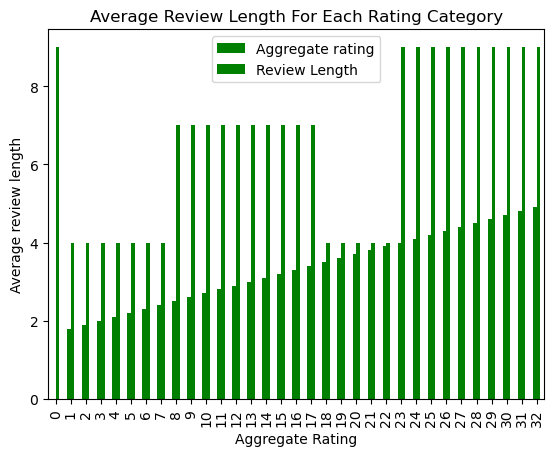

In [18]:
plt.figure(figsize=(10,15))
avg_rev_df.plot(kind='bar',color='green')

plt.title('Average Review Length For Each Rating Category')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average review length')
plt.show()

### **Observation**
- Relation between Agg Rating vs Avg Review Text length
    1. Agg Rating 1.8 to 2.4 - Avg Review text length - 4
    2. Avg Rating 2.5 to 3.4 - Avg Review text length - 7
    3. Avg Rating 3.5 to 3.9 - Avg Review text length - 4
    4. Avg Rating 4.0 to 4.9 - Avg Review text length - 9

## **Task 2 : Votes Analysis**

- **Identify the restaurants with the highest and lowest number of votes.**

In [19]:
cols = ['Votes','Restaurant Name']
df_votes_restaurants=restaurant_df[cols]
print()
print('Restaurant with highest Votes:')
print(df_votes_restaurants.sort_values(by="Votes").tail(1))
print()
print('Restaurant with lowest Votes:')
print(df_votes_restaurants.sort_values(by="Votes").head(90))


Restaurant with highest Votes:
     Votes Restaurant Name
728  10934            Toit

Restaurant with lowest Votes:
      Votes             Restaurant Name
5799      0         Khalsa Eating Point
7411      0   Radha Swami Chaat Bhandar
7414      0  Ram Ram Ji Kachori Bhandar
7415      0          Rana's Food Corner
7416      0         Sanjay Chicken Shop
...     ...                         ...
1185      0                 Solty Hotel
1183      0                 OMG Tiffinz
1181      0      Narayan Fast Food Home
1178      0        Gopi Sweets & Caters
3621      0             Baweja's Haandi

[90 rows x 2 columns]


### **Observation**
- Restaurant with highest Votes
    1. Toit with 10934 Votes
- Restaurant with lowest Votes
    1. Many Restaurants have 0 Votes

- **Analyze if there is a correlation between the number of votes and the rating of a restaurant.**

In [20]:
cols = ['Votes','Aggregate rating']
df_corr_analysis = restaurant_df[cols]
df_corr_analysis

,Votes,Aggregate rating
0,314,4.8
1,591,4.5
2,270,4.4
3,365,4.9
4,229,4.8
...,...,...
9546,788,4.1
9547,1034,4.2
9548,661,3.7
9549,901,4.0


In [21]:
corr=df_corr_analysis.corr()
corr

,Votes,Aggregate rating
Votes,1.000000,0.313691
Aggregate rating,0.313691,1.000000


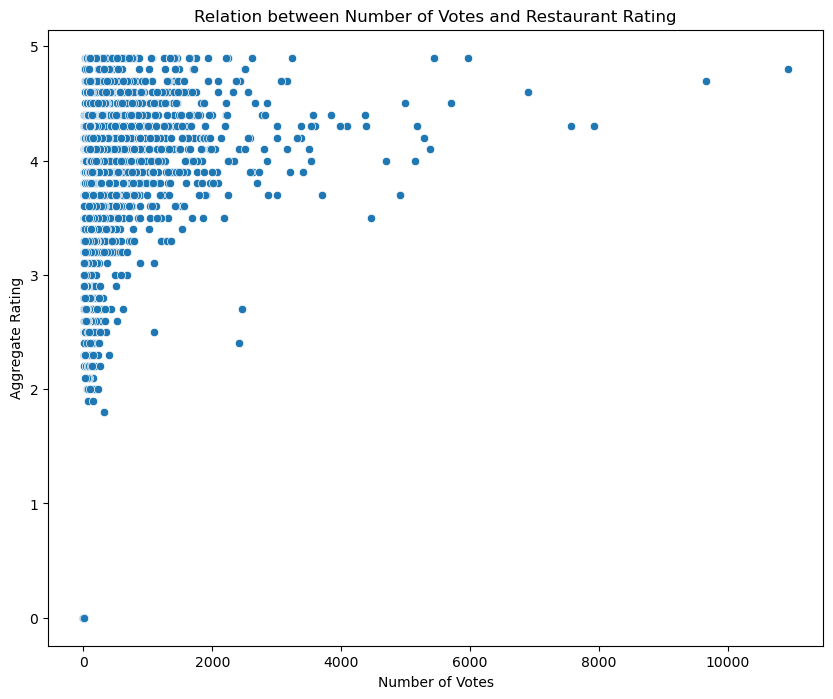

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Votes',y='Aggregate rating',data=df_corr_analysis)
plt.title('Relation between Number of Votes and Restaurant Rating')
plt.xlabel("Number of Votes")
plt.ylabel('Aggregate Rating')
plt.show()

### **Observation**
- **Correlation between the number of votes and the rating of a restaurant is 0.31**

## **Task 3 : Price Range vs. Online Delivery and Table Booking**

- **Analyze if there is a relationship between the price range and the availability of online delivery and table booking**

In [23]:
restaurant_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,9
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,9
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,9
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,9


In [24]:
cols = ['Price range','Has Online delivery','Has Table booking']
df_analysis=restaurant_df[cols].copy()
df_analysis['Has Online delivery']=df_analysis['Has Online delivery'].map({'Yes':True,'No':False})
df_analysis['Has Table booking']=df_analysis['Has Table booking'].map({'Yes':True,'No':False})
df_analysis

,Price range,Has Online delivery,Has Table booking
0,3,False,True
1,3,False,True
2,4,False,True
3,4,False,False
4,4,False,True
...,...,...,...
9546,3,False,False
9547,3,False,False
9548,4,False,False
9549,4,False,False


In [25]:
summary_table=pd.pivot_table(df_analysis,index='Price range',values=
['Has Online delivery','Has Table booking'],aggfunc=sum)
print('Summary Table:')
summary_table

Summary Table:


,Has Online delivery,Has Table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


<Figure size 1000x800 with 0 Axes>

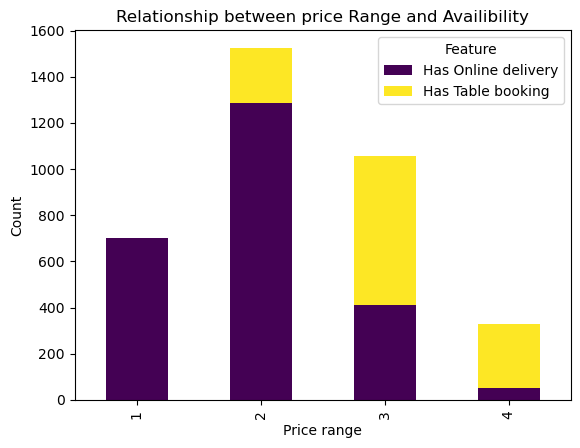

In [26]:
plt.figure(figsize=(10,8))
summary_table.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Relationship between price Range and Availibility')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.legend(title='Feature',loc='upper right')
plt.show()

- **Determine if higher-priced restaurants are more likely to offer these services**

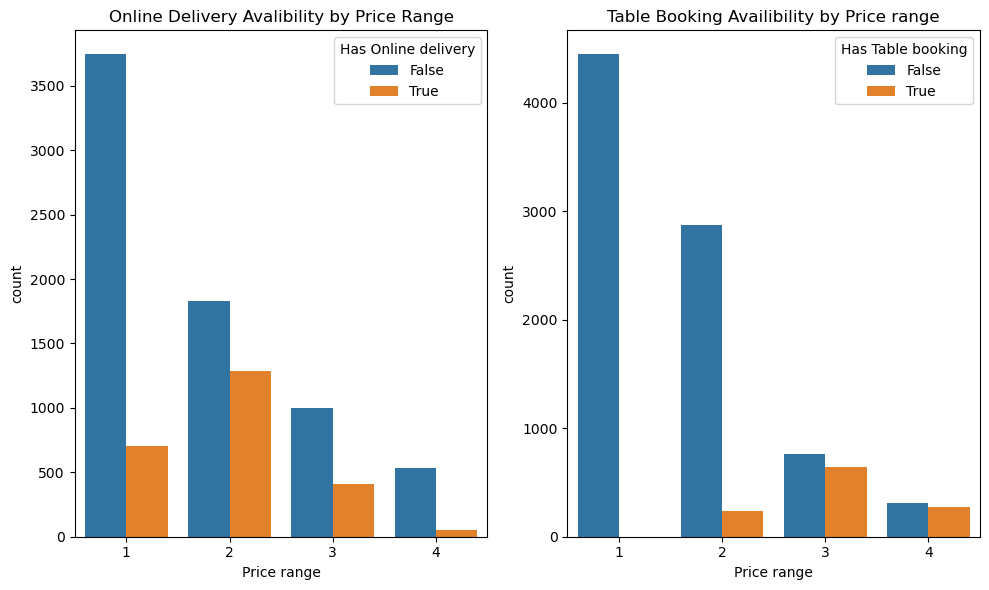

In [27]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x='Price range' , hue='Has Online delivery' ,
data=df_analysis)
plt.title('Online Delivery Avalibility by Price Range')
plt.subplot(1,2,2)
sns.countplot(x='Price range', hue='Has Table booking',
data=df_analysis)
plt.title('Table Booking Availibility by Price range')
plt.tight_layout()
plt.show()

### **Observation**
- **The statement "higher-priced restaurants are more likely to offer these services" is not valid**